# Phase 1 Final Project - MicroMovies Presentation

![alt text](https://fuse.wustl.edu/wp-content/uploads/2017/03/Microsoft-1918x768.jpeg")

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

- What movies have the highest foreign percentage? 
- How many of the top grossing movies are a part of a franchise, sequel or nostalgia?  
- What are the highest grossing MPAA ratings?

In [1]:
#Import libraries
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import csv
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### We'll start by using the scraped 2019 Box Office Records from www.the-numbers.com

In [2]:
df = pd.read_csv('Data/2019_Movie_List.csv') 

In [3]:
df

,Rank,Movie,Worldwide Box Office,Domestic Box Office,International Box Office,Domestic Share
0,1,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564",30.68%
1,2,The Lion King,"$1,654,381,934","$543,638,043","$1,110,743,891",32.86%
2,3,Frozen II,"$1,447,244,586","$477,373,578","$969,871,008",32.99%
3,4,Spider-Man: Far From Home,"$1,131,219,645","$390,532,085","$740,687,560",34.52%
4,5,Captain Marvel,"$1,129,727,388","$426,829,839","$702,897,549",37.78%
...,...,...,...,...,...,...
95,96,ek-si-teu,"$67,044,017","$478,949","$66,565,068",0.71%
96,97,Happy Death Day 2U,"$64,686,515","$28,148,130","$36,538,385",43.51%
97,98,Eiga Doraemon: Nobita no Getsumen Tansaki,"$63,191,904",NaN,"$63,191,904",NaN
98,99,Cold Pursuit,"$62,599,159","$32,138,862","$30,460,297",51.34%


## What movies have the highest foreign percentage and the highest foreign gross numbers? 

### Let's create an International Share to show the percentage of the Worldwide Box Office comes from International Box Office as well as convert the numbers into integers.

In [4]:
df = pd.read_csv('Data/2019_Movies_Numbers.csv') 
df

,Rank,Movie,Worldwide Box Office,Domestic Box Office,International Box Office,Domestic Share,International Share
0,1,Avengers: Endgame,2797800564,858373000,1939427564,30.68,69.32
1,2,The Lion King,1654381934,543638043,1110743891,32.86,67.14
2,3,Frozen II,1447244586,477373578,969871008,32.99,67.01
3,4,Spider-Man: Far From Home,1131219645,390532085,740687560,34.52,65.48
4,5,Captain Marvel,1129727388,426829839,702897549,37.78,62.22
...,...,...,...,...,...,...,...
95,96,ek-si-teu,67044017,478949,66565068,0.71,99.29
96,97,Happy Death Day 2U,64686515,28148130,36538385,43.51,56.49
97,98,Eiga Doraemon: Nobita no Getsumen Tansaki,63191904,0,63191904,0.00,100.00
98,99,Cold Pursuit,62599159,32138862,30460297,51.34,48.66


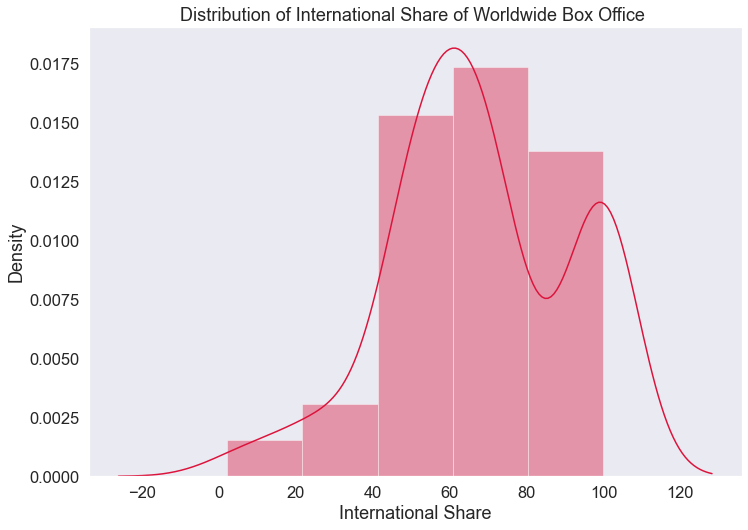

In [6]:
#Try a density plot
sns.set(style="dark", font_scale=1.5, rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['International Share'],
             color='crimson').set_title('Distribution of International Share of Worldwide Box Office ');

## Key Takeaway 
A majority of the Box Office money is made International

___________________________________________________________________________________________________________

# How many of the top grossing movies are a part of a franchise, sequel or nostalgia?

### First we'll identify the movies that are a part of a franchise, sequel or nostalgia? 

In [10]:
df_franchise = pd.read_csv('Data/2019_Franchise_Numbers.csv')

In [11]:
df_franchise

,Rank,Movie,Worldwide Box Office,Domestic Box Office,International Box Office,Domestic Share,International Share,Franchise
0,1,Avengers: Endgame,2797800564,858373000,1939427564,30.68,69.32,Yes
1,2,The Lion King,1654381934,543638043,1110743891,32.86,67.14,Yes
2,3,Frozen II,1447244586,477373578,969871008,32.99,67.01,Yes
3,4,Spider-Man: Far From Home,1131219645,390532085,740687560,34.52,65.48,Yes
4,5,Captain Marvel,1129727388,426829839,702897549,37.78,62.22,Yes
...,...,...,...,...,...,...,...,...
95,96,ek-si-teu,67044017,478949,66565068,0.71,99.29,No
96,97,Happy Death Day 2U,64686515,28148130,36538385,43.51,56.49,Yes
97,98,Eiga Doraemon: Nobita no Getsumen Tansaki,63191904,0,63191904,0.00,100.00,No
98,99,Cold Pursuit,62599159,32138862,30460297,51.34,48.66,Yes


### Next we'll evaluate the Box Office numbers of the movies a part of a franchise, nostalgia, and sequel vs. the movies that don't fall under any of these categories. 

In [12]:
df_franchise_agg = {}
for bo in df_franchise.columns[2:5]: 
    df_franchise_agg[bo] = df_franchise.groupby('Franchise')[bo].mean()
    
df_franchise_agg = pd.DataFrame(df_franchise_agg)

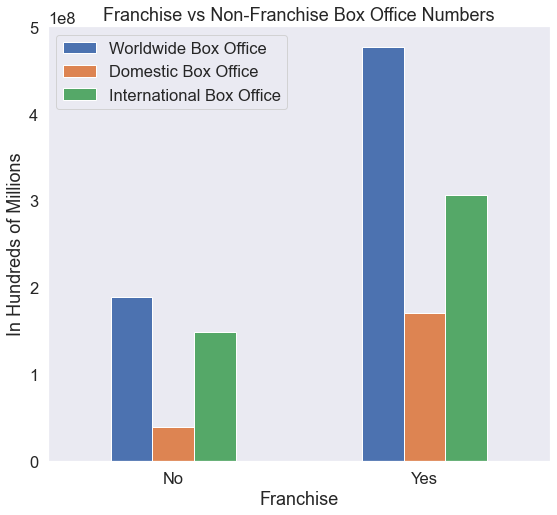

In [13]:
df_franchise_agg.plot(kind='bar', figsize=(9,8))
plt.xticks(rotation=0)
plt.ylabel('In Hundreds of Millions')
plt.title('Franchise vs Non-Franchise Box Office Numbers');

## Key Takeaway
Movies that are a part of a franchise do significantly better in both Internationally and Domestically.

___________________________________________________________________________________________________________

### What if Microsoft wants to produce a movie without a franchise?

In [14]:
#Dataframe without the Franchise movies
df_franchise[df_franchise['Franchise'] == 'No']

,Rank,Movie,Worldwide Box Office,Domestic Box Office,International Box Office,Domestic Share,International Share,Franchise
11,12,Ne Zha Zhi Mo Tong Jiang Shi,742514069,3695533,738818536,0.50,99.50,No
12,13,Liu Lang Di Qiu,727714822,5875487,721839335,0.81,99.19,No
16,17,Wo he wo de zu guo,465418019,2323409,463094610,0.50,99.50,No
19,20,Zhongguo jizhang,417850370,706572,417143798,0.17,99.83,No
20,21,Alita: Battle Angel,401900040,85838210,316061830,21.36,78.64,No
22,23,Once Upon a Timeâ¦in Hollywood,377312380,142502728,234809652,37.77,62.23,No
23,24,1917,366890181,159227644,207662537,43.40,56.60,No
26,27,Feng Kuang De Wai Xing Ren,326150303,0,326150303,0.00,100.00,No
29,30,Us,256091919,175084580,81007339,68.37,31.63,No
30,31,Fei Chi Ren Sheng,255832826,0,255832826,0.00,100.00,No


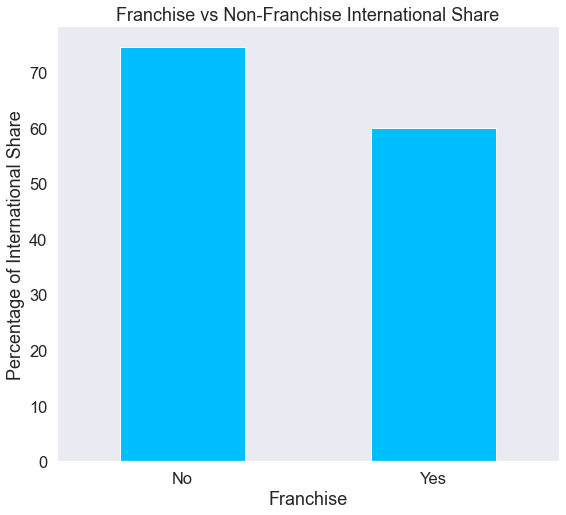

In [15]:
df_franchise.groupby('Franchise')['International Share'].mean().plot(kind='bar',
                                                                     figsize=(9,8),
                                                                     color='deepskyblue')
plt.xticks(rotation=0)
plt.ylabel('Percentage of International Share')
plt.title('Franchise vs Non-Franchise International Share');

## Key Takeaway
Non-Franchise movies have a significant amount of international box office account for their success. 

___________________________________________________________________________________________________________

## What are the highest grossing MPAA ratings?

### Let's start by pulling the ratings from the different movie pages.

In [16]:
df_mpaa = pd.read_csv('Data/_2019_MPAA_Numbers.csv').fillna('N/A')

In [17]:
df_mpaa

,Rank,Movie,Worldwide Box Office,Domestic Box Office,International Box Office,Domestic Share,International Share,Franchise,MPAA Rating
0,1,Avengers: Endgame,2797800564,858373000,1939427564,30.68,69.32,Yes,PG-13
1,2,The Lion King,1654381934,543638043,1110743891,32.86,67.14,Yes,PG
2,3,Frozen II,1447244586,477373578,969871008,32.99,67.01,Yes,PG
3,4,Spider-Man: Far From Home,1131219645,390532085,740687560,34.52,65.48,Yes,PG-13
4,5,Captain Marvel,1129727388,426829839,702897549,37.78,62.22,Yes,PG-13
...,...,...,...,...,...,...,...,...,...
95,96,ek-si-teu,67044017,478949,66565068,0.71,99.29,No,Not Rated
96,97,Happy Death Day 2U,64686515,28148130,36538385,43.51,56.49,Yes,PG-13
97,98,Eiga Doraemon: Nobita no Getsumen Tansaki,63191904,0,63191904,0.00,100.00,No,N/A
98,99,Cold Pursuit,62599159,32138862,30460297,51.34,48.66,Yes,R


### Now let's find out which ratings actually earned the most average amount of money in the box office

In [18]:
avg_box_off = df_mpaa.groupby('MPAA Rating')['Worldwide Box Office'].mean().sort_values(ascending=False)

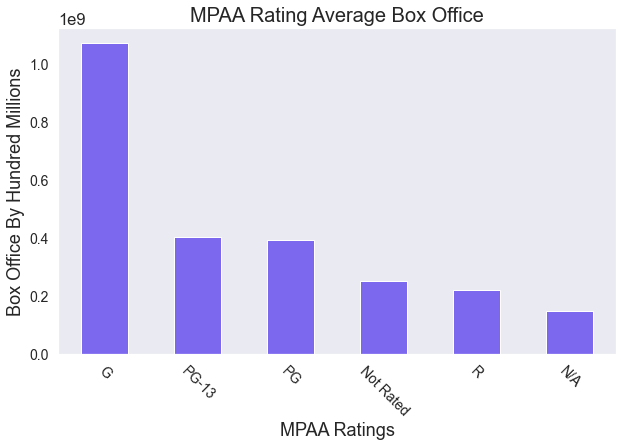

In [19]:
avg_box_off.plot(kind='bar', figsize=(10,6), color='mediumslateblue')
plt.title('MPAA Rating Average Box Office', fontsize='20')
plt.ylabel('Box Office By Hundred Millions', fontsize='18')
plt.xlabel('MPAA Ratings', fontsize='18')
plt.xticks(fontsize='14', rotation=-45)
plt.yticks(fontsize='14');

## Key Takeaway
MPAA Rating G is by far the highest grossing genre.

______________________________________________________________________________________________________________
Based on the analysis, these are the recommendations my team have for starting MicroMovies:

- The film script, characters, and theme need to appeal to an international audience.
- MicroMovies should do some research on shows, movies or books that could be adapted into a film.
- In the MicroMovies search, they should prioritze films that are G rated.

Next Steps

- MicroMovies should do research on which international countries account for the highest percentage of international box office share.
- MicroMovies should analyze which genres and MPAA Ratings do the best internationally and domestically